In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from keras import models
from keras import layers
from keras import optimizers

## Look into details of missing values
#### Step1: Check missing values in both train.csv and test.csv
#### Step2: Check the missing proportional of each column 
#### Step3: Check the correlation between missing features and 'site_eui' to get the importantce of that feature

In [2]:
## Step1: read original train and test datasets
df_train= pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
print(df_train.shape)
print(df_test.shape)

(75757, 64)
(9705, 63)


In [3]:
## find if there are missing data for df_train
np.sum(df_train.isnull())

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [4]:
## find if there are missing data for df_test
np.sum(df_test.isnull())

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

In [137]:
## find the columns which has no missing values
df_train.columns[np.sum(df_train.isnull())==0]

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'ELEVATION', 'january_min_temp', 'january_avg_temp',
       'january_max_temp', 'february_min_temp', 'february_avg_temp',
       'february_max_temp', 'march_min_temp', 'march_avg_temp',
       'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp',
       'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp',
       'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp',
       'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'av

In [5]:
## Step2: Find the columns which has missing values and calculate their missing propertiona
## Find the columns which has missing values for df_train and df_test
print (df_train.columns[np.sum(df_train.isnull())!=0])
print (df_test.columns[np.sum(df_test.isnull())!=0])

Index(['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'],
      dtype='object')
Index(['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'],
      dtype='object')


In [6]:
## Find the data type of missing values 
df_train_missing=df_train[['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']]
df_train_missing.head()

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,1942.0,11.0,1.0,1.0,1.0,NaN
1,1955.0,45.0,1.0,NaN,1.0,12.0
2,1951.0,97.0,1.0,NaN,1.0,12.0
3,1980.0,46.0,1.0,NaN,1.0,12.0
4,1985.0,100.0,1.0,1.0,1.0,NaN


In [48]:
## get percentage of null in each column of df_train
pd.options.display.float_format = '{:.4f}'.format
df_train_missing_rate = np.sum(df_train_missing.isnull())/df_train.shape[0]
df_train_missing_rate

year_built                  0.0242
energy_star_rating          0.3526
direction_max_wind_speed    0.5423
direction_peak_wind_speed   0.5519
max_wind_speed              0.5423
days_with_fog               0.6045
dtype: float64

In [49]:
## get percentage of null in each column of df_test
df_test_missing=df_test[['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']]
df_test_missing_rate=np.sum(df_test_missing.isnull())/df_test.shape[0]
df_train_missing_rate


year_built                  0.0242
energy_star_rating          0.3526
direction_max_wind_speed    0.5423
direction_peak_wind_speed   0.5519
max_wind_speed              0.5423
days_with_fog               0.6045
dtype: float64

In [53]:
## Step3: Use correlation to determine if those columns(w/ missing values) are important or negligible
## Get correlation between attributes w/ missing and site_eui from df_train
df_miss_eui=df_train[['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui']]
corr_df_miss_eui = df_miss_eui.corr()
corr_df_miss_eui

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
year_built,1.0000,-0.0739,0.0012,-0.0096,0.0049,0.0842,0.0172
energy_star_rating,-0.0739,1.0000,-0.0010,0.0020,-0.0003,0.0194,-0.5110
direction_max_wind_speed,0.0012,-0.0010,1.0000,0.9998,0.9888,0.3304,0.0102
direction_peak_wind_speed,-0.0096,0.0020,0.9998,1.0000,0.9922,0.3301,0.0136
max_wind_speed,0.0049,-0.0003,0.9888,0.9922,1.0000,0.3540,0.0106
days_with_fog,0.0842,0.0194,0.3304,0.3301,0.3540,1.0000,-0.0554
site_eui,0.0172,-0.5110,0.0102,0.0136,0.0106,-0.0554,1.0000


<AxesSubplot:>

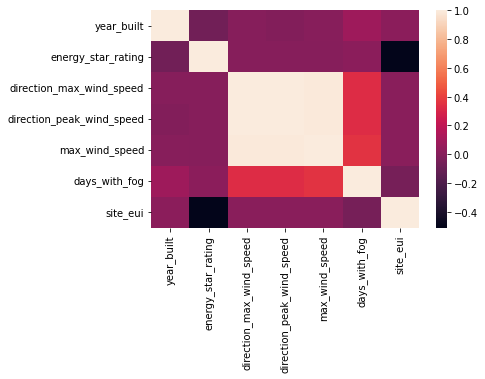

In [54]:
# get heatmap for the correlation between attributes w/ missing values
sns.heatmap(corr_df_miss_eui)

In [55]:
## sort the correlation between attributes w/ missing and 'site_eui'
corr_dfmiss_eui = corr_df_miss_eui['site_eui'].sort_values()
frame = { 'correlation with site_eui': corr_dfmiss_eui}  
dfmiss_eui = pd.DataFrame(frame)
print (dfmiss_eui)

                           correlation with site_eui
energy_star_rating                           -0.5110
days_with_fog                                -0.0554
direction_max_wind_speed                      0.0102
max_wind_speed                                0.0106
direction_peak_wind_speed                     0.0136
year_built                                    0.0172
site_eui                                      1.0000


In [52]:
## compare the propotional of missing for df_train and df_test and correlation with site_eui
frame = { 'train missing rate': df_train_missing_rate, 'test missing rate': df_test_missing_rate, 'correlation with site_eui': corr_dfmiss_eui}  
df_missingrate_ana = pd.DataFrame(frame)
#print (df_buildtype_ana)
#df_missingrate_ana_sort = df_missingrate_ana.sort_values('site_eui Mean')
df_missingrate_ana.sort_values('train missing rate')


,train missing rate,test missing rate,correlation with site_eui
year_built,0.0242,0.0095,0.0172
energy_star_rating,0.3526,0.2323,-0.5110
direction_max_wind_speed,0.5423,0.8836,0.0102
max_wind_speed,0.5423,0.8836,0.0106
direction_peak_wind_speed,0.5519,0.8836,0.0136
days_with_fog,0.6045,0.9394,-0.0554
site_eui,NaN,NaN,1.0000


,train missing rate,test missing rate,correlation with site_eui
days_with_fog,0.6045,0.6045,-0.0554
direction_max_wind_speed,0.5423,0.5423,0.0102
direction_peak_wind_speed,0.5519,0.5519,0.0136
energy_star_rating,0.3526,0.3526,-0.5110
max_wind_speed,0.5423,0.5423,0.0106
site_eui,NaN,NaN,1.0000
year_built,0.0242,0.0242,0.0172


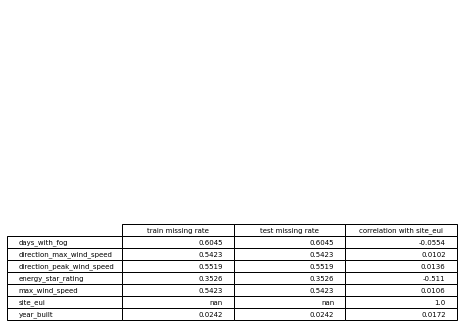

In [51]:
## save missing rate to image
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
df_missingrate_ana_round=df_missingrate_ana.round({"train missing rate":4, "test missing rate":4, 'correlation with site_eui':4 })
table(ax, df_missingrate_ana_round)  # where df is your data frame

plt.savefig('Images/missing_rate.png')

##### Missing_finding1: year_built has only 2% missing in df_train and 0.9% missing in df_test should be impute
##### Missing_finding2: energy_star_rating has high related to site_eui, so even it has around 20-30% missing, still need to be impute
##### Missing_finding3: the rest of four features has high missing rate in both df_train and inparticular df_test so should be dropped. 

##### Missing_Finding1. There are only 2% missing value in 'year_built', we can also consider their 'year_factors' to know if they can be predicted from 'year_factors' or just safely dropped.
##### Missing_Finding2. Look into the correlation between these missing columns and 'site_eui' to see if any of them with high missing rate can be dropped. The result indicates that energy_star_rating should stay due to the high correlation with 'site_eui'
##### Missing_Finding3. 'days_with_fog', 'direction_max_wind_speed', 'max_wind_speed', 'direction_peak_wind_speed', 'direction_peak_wind_speed' are safe to be dropped due to the low correlation with 'site_eui'

## Question 2:  Do those older buildings comsume more energy?
#### Step1: get the avg. site_eui for buildings per build_year by groupby 'site_eui'
#### Step2: aggregate the counts. buildings per build_year by groupby 'site_eui'
#### Step3: Analyze the above two steps for commercial and residential buildings separately.

In [56]:
## Find correlation between 'year_built' and 'Year_Factor'
df_train_corr = df_train.corr()
df_train_corr['year_built']['Year_Factor']

0.08414319996850916

#### Summary: 'Year_Factor' feature has low correlation with 'year_built'

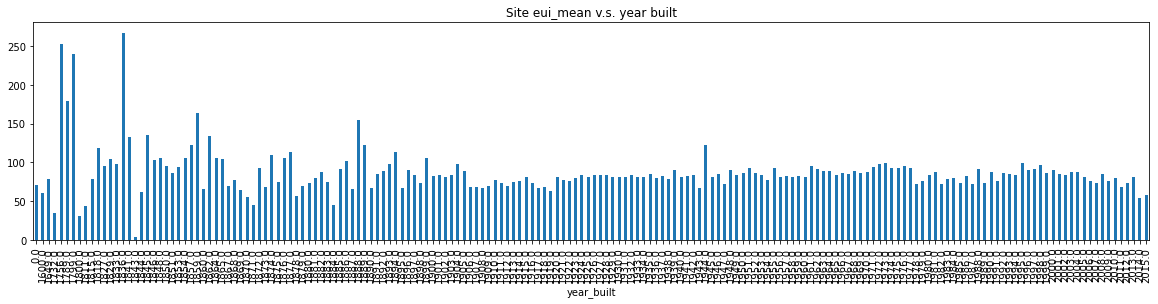

In [63]:
## Step1: Find the mean of 'site_eui' based on 'year_built' (for df_train)
df_yearbuilt = df_train.dropna(subset = ['year_built'])
df_yearbuilt_mean = df_yearbuilt.groupby('year_built').mean()['site_eui']
plot_yearbuilt_mean = df_yearbuilt_mean.plot(kind='bar', figsize=(20,4), title = 'Site eui_mean v.s. year built')

plot_yearbuilt_mean.figure.savefig('Images/plot_yearbuilt_mean.pdf')

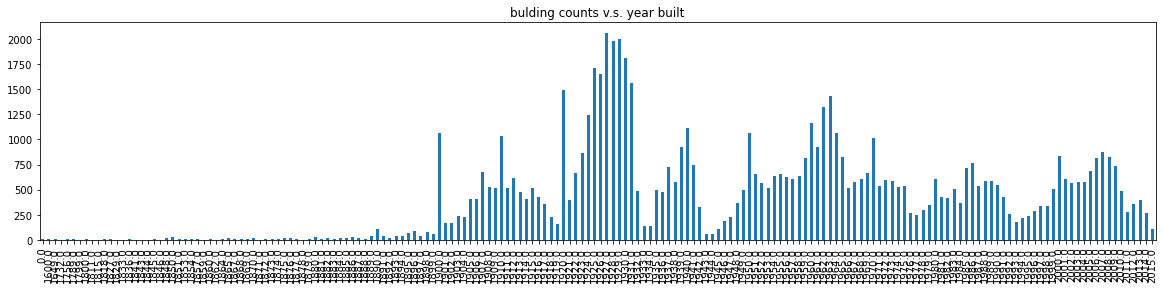

In [64]:
## Find the count of buildings based on 'year_built' (for df_train)
df_yearbuilt_count = df_yearbuilt['year_built'].value_counts().sort_index()
plot_yearbuilt_count = df_yearbuilt_count.plot(kind='bar',figsize=(20,4), title = 'bulding counts v.s. year built')

plot_yearbuilt_count.figure.savefig('Images/plot_yearbuilt_count.pdf')

#### Q2_finding_1: The means of site_eui are fluculated more significately year by year for those years before 1900 because here are not many data each year. 
##### Q2_finding_2: The means of site_eui didn't show a clear trend based on the year_built for df_train

In [65]:
## Combine Mean and Counts of buildings each year
frame = { 'site_eui Mean': df_yearbuilt_mean, 'count of buildings': df_yearbuilt_count}  
df_yearbuilt_ana = pd.DataFrame(frame)
print (df_yearbuilt_ana)
#df_yearbuilt_ana.sort_values('site_eui Mean')

           site_eui Mean  count of buildings
0.0000           71.2746                   6
1600.0000        60.7015                   6
1649.0000        78.0321                   4
1732.0000        35.0770                   1
1756.0000       252.7577                   4
...                  ...                 ...
2011.0000        68.1337                 279
2012.0000        73.5516                 353
2013.0000        80.8726                 398
2014.0000        53.7745                 269
2015.0000        57.6372                 111

[180 rows x 2 columns]


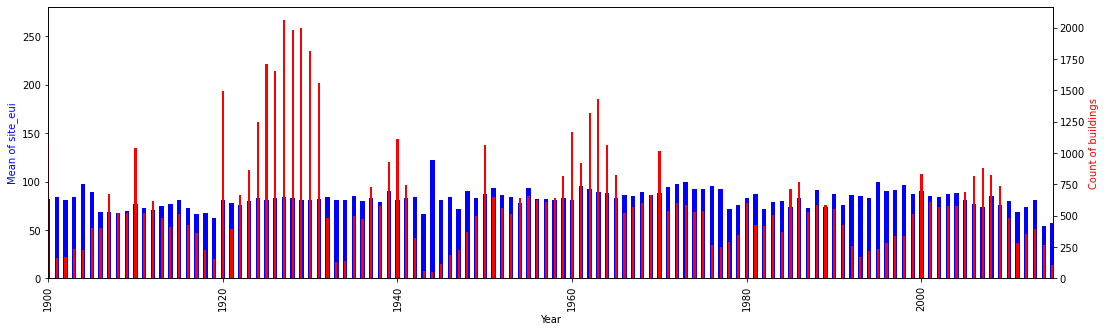

<Figure size 432x288 with 0 Axes>

In [66]:
## plot the Mean and Count of buildings per year 
x = df_yearbuilt_ana.index
y1 = df_yearbuilt_ana['site_eui Mean']
y2 = df_yearbuilt_ana['count of buildings']

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 5)

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'b', width = 0.5)
ax2.bar(x, y2, color = 'r', width = 0.25)

ax1.set_xlabel('Year')
ax1.set_ylabel('Mean of site_eui', color='b')
ax2.set_ylabel('Count of buildings', color='r')
plt.xlim([1900, 2015])

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.show()

plt.savefig('Images/yearbuilt_eui.png')

In [68]:
## Step2: Look into the mean site_eui of each year for residential and commercial buildings 
## get means for commercial buildings by year_built
df_commercial = df_yearbuilt.loc[df_yearbuilt['building_class'] == 'Commercial']
df_com_year_mean = df_commercial.groupby('year_built').mean()['site_eui']
df_com_year_mean

year_built
0.0000       71.2746
1600.0000    60.7015
1732.0000    35.0770
1756.0000   252.7577
1789.0000   179.6269
              ...   
2011.0000    85.2152
2012.0000    94.0543
2013.0000   116.7765
2014.0000    79.1229
2015.0000    77.2018
Name: site_eui, Length: 175, dtype: float64

<AxesSubplot:title={'center':'Site eui_mean v.s. year built for Commercial buildings'}, xlabel='year_built'>

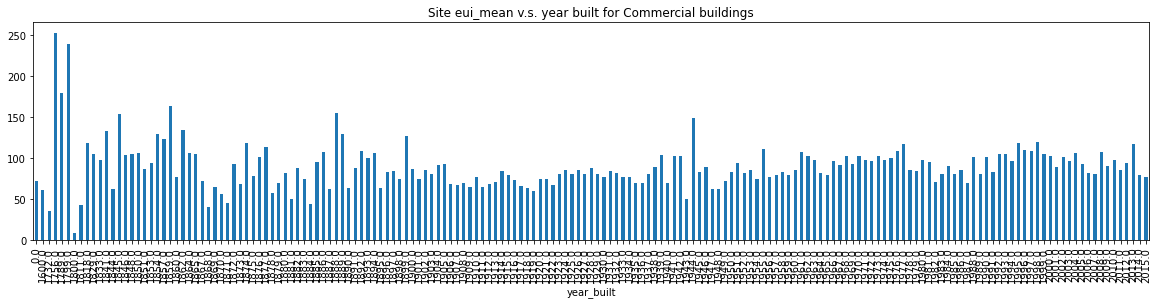

In [69]:
## plot means for commercial buildings by year_built
df_com_year_mean.plot(kind='bar', figsize=(20,4), title = 'Site eui_mean v.s. year built for Commercial buildings')

<AxesSubplot:title={'center':'bulding counts v.s. year built for Commercial buildings'}>

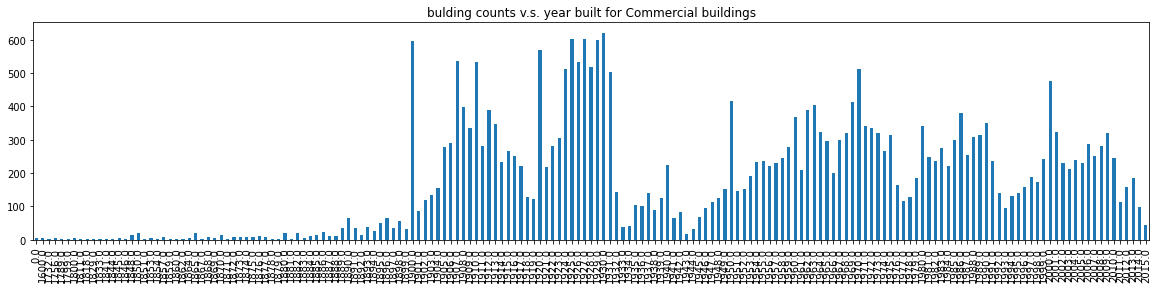

In [70]:
## plot and get count for commercial buildings by year_built
df_com_year_count = df_commercial['year_built'].value_counts().sort_index()
df_com_year_count.plot(kind='bar',figsize=(20,4), title = 'bulding counts v.s. year built for Commercial buildings' )

In [71]:
## Combine Mean and Counts of commercial buildings each year
frame = { 'site_eui Mean': df_com_year_mean, 'count of buildings': df_com_year_count}  
df_commer_year_ana = pd.DataFrame(frame)
print (df_commer_year_ana)

           site_eui Mean  count of buildings
0.0000           71.2746                   6
1600.0000        60.7015                   6
1732.0000        35.0770                   1
1756.0000       252.7577                   4
1789.0000       179.6269                   3
...                  ...                 ...
2011.0000        85.2152                 114
2012.0000        94.0543                 157
2013.0000       116.7765                 185
2014.0000        79.1229                  97
2015.0000        77.2018                  43

[175 rows x 2 columns]


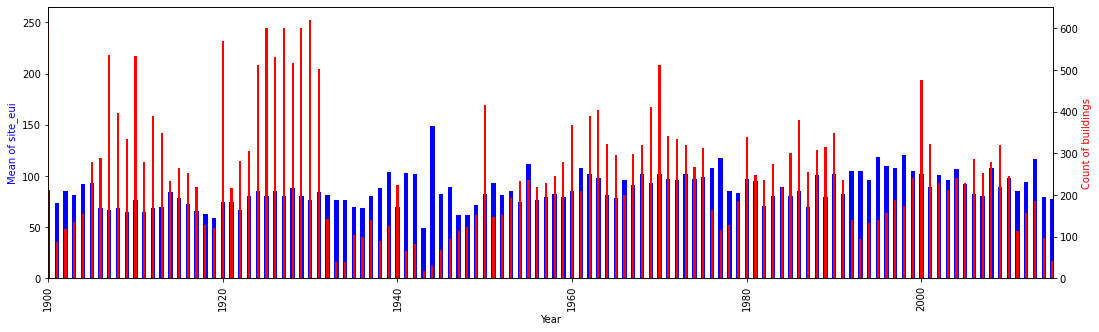

<Figure size 432x288 with 0 Axes>

In [72]:
## plot the Mean and Count of commercial buildings per year 
x = df_commer_year_ana.index
y1 = df_commer_year_ana['site_eui Mean']
y2 = df_commer_year_ana['count of buildings']

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 5)

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'b', width = 0.5)
ax2.bar(x, y2, color = 'r', width = 0.25)

ax1.set_xlabel('Year')
ax1.set_ylabel('Mean of site_eui', color='b')
ax2.set_ylabel('Count of buildings', color='r')
plt.xlim([1900, 2015])

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.show()
plt.savefig('Images/ComYearbuilt_eui.png')

In [73]:
## get means for residential buildings by year_built
df_residential = df_yearbuilt.loc[df_yearbuilt['building_class'] == 'Residential']
df_res_year_mean = df_residential.groupby('year_built').mean()['site_eui']
df_res_year_mean

year_built
1649.0000    78.0321
1800.0000    74.5956
1815.0000    78.5874
1827.0000    95.5175
1836.0000   267.0709
              ...   
2011.0000    56.3319
2012.0000    57.1286
2013.0000    49.6885
2014.0000    39.4792
2015.0000    45.2655
Name: site_eui, Length: 150, dtype: float64

<AxesSubplot:title={'center':'Site eui_mean v.s. year built for Residential buildings'}, xlabel='year_built'>

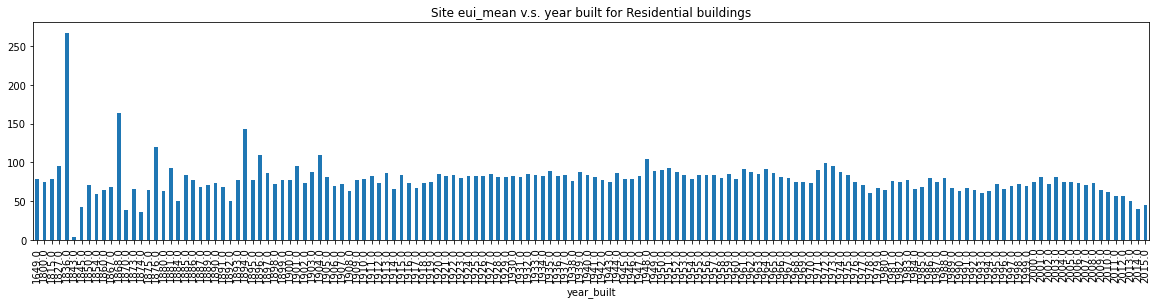

In [74]:
## plot means for residential buildings by year_built
df_res_year_mean.plot(kind='bar', figsize=(20,4), title = 'Site eui_mean v.s. year built for Residential buildings')

<AxesSubplot:title={'center':'bulding counts v.s. year built for Residential buildings'}>

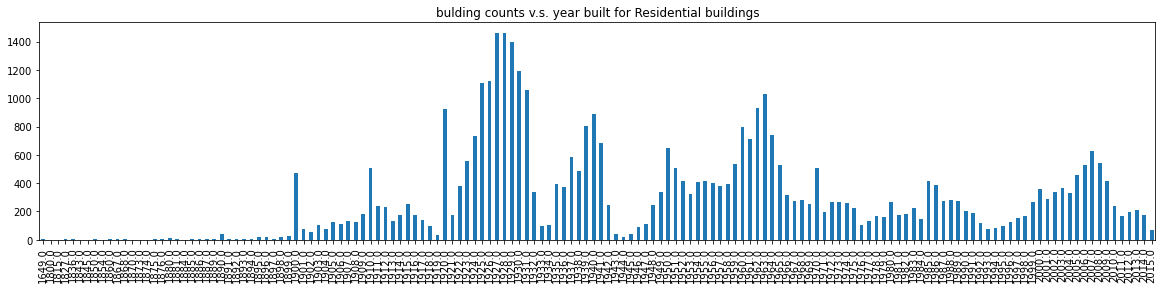

In [75]:
## plot and get counts for residential buildings by year_built
df_res_year_count = df_residential['year_built'].value_counts().sort_index()
df_res_year_count.plot(kind='bar',figsize=(20,4), title = 'bulding counts v.s. year built for Residential buildings' )

In [76]:
## Combine Mean and Counts of residential buildings each year
frame = { 'site_eui Mean': df_res_year_mean, 'count of buildings': df_res_year_count}  
df_resident_year_ana = pd.DataFrame(frame)
print (df_resident_year_ana)

           site_eui Mean  count of buildings
1649.0000        78.0321                   4
1800.0000        74.5956                   2
1815.0000        78.5874                   1
1827.0000        95.5175                   4
1836.0000       267.0709                   4
...                  ...                 ...
2011.0000        56.3319                 165
2012.0000        57.1286                 196
2013.0000        49.6885                 213
2014.0000        39.4792                 172
2015.0000        45.2655                  68

[150 rows x 2 columns]


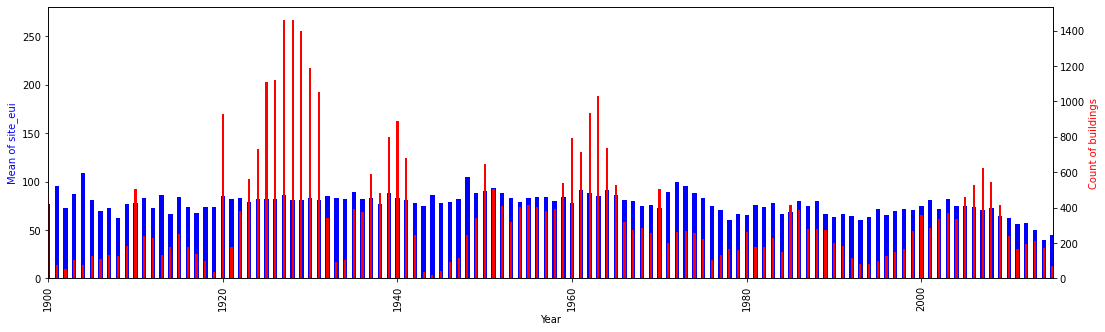

<Figure size 432x288 with 0 Axes>

In [77]:
## plot the Mean and Count of residential buildings per year 
x = df_resident_year_ana.index
y1 = df_resident_year_ana['site_eui Mean']
y2 = df_resident_year_ana['count of buildings']

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 5)

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'b', width = 0.5)
ax2.bar(x, y2, color = 'r', width = 0.25)

ax1.set_xlabel('Year')
ax1.set_ylabel('Mean of site_eui', color='b')
ax2.set_ylabel('Count of buildings', color='r')
plt.xlim([1900, 2015])

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.show()
plt.savefig('Images/ResYearbuilt_eui.png')

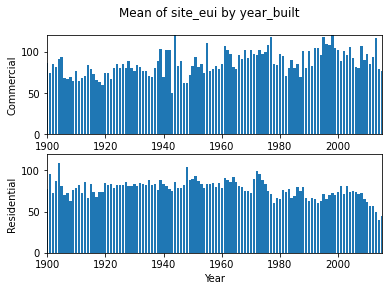

In [78]:
## Compare the mean site_eui for Commercial buildings and Residential buildings groupby the 'built_year'
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Mean of site_eui by year_built')
ax1.bar(df_commer_year_ana.index, df_commer_year_ana['site_eui Mean'])
ax2.bar(df_resident_year_ana.index, df_resident_year_ana['site_eui Mean'])
ax1.set_xlim([1900, 2015])
ax2.set_xlim([1900, 2015])
ax1.set_ylim([0,120])
ax2.set_ylim([0,120])
ax2.set_xlabel('Year')
ax1.set_ylabel('Commercial')
ax2.set_ylabel('Residential')

fig.figure.savefig('Images/compare_com_res_eui.pdf')


#### Summary:
##### Q2_finding_1: The means of site_eui are fluculated more significately year by year for those years before 1900 because here are not many data each year. 
##### Q2_finding_2: The means of site_eui didn't show a clear trend based on the year_built for df_train
##### Q3_finding_3: However, if look into Residential building and Commercial build, mean site_eui of Residential buildings decrease along the year_built, inparticular after 2000s

##### Summary: since the count of built_year is left-skewed distribution, I suggest to handle missing values in 'year_built' using mode

## Handle missing data
#### Step1: Drop 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'
#### Step2: Fill NaN for 'year_built' using mode value 
#### Step3:  Impute NaN for 'energy_star_rate' columns using ML predicted values

### Step1: Drop 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'

In [97]:
## (1) For df_all_onehot data
df_all_onehot = pd.read_csv('Data/df_all_onehotencode.csv')
print (df_all_onehot.columns[np.sum(df_all_onehot.isnull())!=0])
df_all_onehot_dropcol = df_all_onehot.drop(['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'], axis = 1)
print (df_all_onehot_dropcol.columns[np.sum(df_all_onehot_dropcol.isnull())!=0])

Index(['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui'],
      dtype='object')
Index(['year_built', 'energy_star_rating', 'site_eui'], dtype='object')


In [98]:
## (2) For df_all_ordinal data
df_all_ordinal = pd.read_csv('Data/df_all_ordinalencode.csv')
print (df_all_ordinal.columns[np.sum(df_all_ordinal.isnull())!=0])
df_all_ordinal_dropcol = df_all_ordinal.drop(['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'], axis = 1)
print (df_all_ordinal_dropcol.columns[np.sum(df_all_ordinal_dropcol.isnull())!=0])

Index(['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui'],
      dtype='object')
Index(['year_built', 'energy_star_rating', 'site_eui'], dtype='object')


### Step2: Fill NaN for 'year_built' using mode value 

In [99]:
## (1) For df_all_onehot data
#Fill all missing values with the mode of the 'year_built'.
df_all_onehot_dropcol_fillyear = df_all_onehot_dropcol
df_all_onehot_dropcol_fillyear['year_built'] = df_all_onehot_dropcol['year_built'].fillna(df_all_onehot_dropcol['year_built'].mode()[0])

# test look
print (df_all_onehot_dropcol.columns[np.sum(df_all_onehot_dropcol.isnull())!=0])
print (df_all_onehot_dropcol_fillyear.columns[np.sum(df_all_onehot_dropcol_fillyear.isnull())!=0])

Index(['energy_star_rating', 'site_eui'], dtype='object')
Index(['energy_star_rating', 'site_eui'], dtype='object')


In [100]:
## Save df_all_onehot_dropcol_fillyear to df_all_onehot_dropcol_fillyear.csv
df_all_onehot_dropcol_fillyear.to_csv('Data/df_all_onehot_dropcol_fillyear.csv', index=False)
df_all_test = pd.read_csv('Data/df_all_onehot_dropcol_fillyear.csv')
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Columns: 126 entries, Year_Factor to building_class_Residential
dtypes: float64(89), int64(37)
memory usage: 82.2 MB


In [101]:
## (2) For df_all_ordinal data
#Fill all missing values with the mode of the 'year_built'.
df_all_ordinal_dropcol_fillyear = df_all_ordinal_dropcol
df_all_ordinal_dropcol_fillyear['year_built'] = df_all_ordinal_dropcol['year_built'].fillna(df_all_ordinal_dropcol['year_built'].mode()[0])

# test look
print (df_all_ordinal_dropcol.columns[np.sum(df_all_ordinal_dropcol.isnull())!=0])
print (df_all_ordinal_dropcol_fillyear.columns[np.sum(df_all_ordinal_dropcol_fillyear.isnull())!=0])

Index(['energy_star_rating', 'site_eui'], dtype='object')
Index(['energy_star_rating', 'site_eui'], dtype='object')


In [102]:
## Save df_all_ordinal_fillyear to df_all_ordinal_dropcol_fillyear.csv
df_all_ordinal_dropcol_fillyear.to_csv('Data/df_all_ordinal_dropcol_fillyear.csv', index=False)
df_all_test = pd.read_csv('Data/df_all_ordinal_dropcol_fillyear.csv')

#### Step3:  Fill NaN for 'energy_star_rate' columns using predicted values
##### 1): Find the top 10 correlated attributes with 'energy_star_rate'
##### 2): Use MICE method to predict the missing values in the 'energy_star_rate' column 

In [103]:
## Step3: 1)get high correlation features with 'energy_star_rating'
corr_df = df_train.corr()
corr_df['energy_star_rating'].sort_values()
print (corr_df['energy_star_rating'].sort_values().head(10))
print (corr_df['energy_star_rating'].sort_values().tail(10))

site_eui               -0.5110
snowfall_inches        -0.1407
heating_degree_days    -0.1333
days_below_30F         -0.1324
days_below_20F         -0.1134
snowdepth_inches       -0.1111
precipitation_inches   -0.1099
july_avg_temp          -0.1071
june_avg_temp          -0.1060
cooling_degree_days    -0.0987
Name: energy_star_rating, dtype: float64
february_max_temp    0.1044
april_min_temp       0.1060
february_min_temp    0.1264
march_min_temp       0.1346
march_avg_temp       0.1372
february_avg_temp    0.1375
january_min_temp     0.1445
january_avg_temp     0.1494
energy_star_rating   1.0000
days_above_110F         NaN
Name: energy_star_rating, dtype: float64


In [104]:
## Step3: 2)impute NaN using MICE algorithm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [105]:
## Impute 'energy_star_rating' for onehot data
df_all_onehot_dropcol_fillyear.shape

(85462, 126)

In [106]:
mice_onehot_cols = ['snowfall_inches', 'heating_degree_days', 'days_below_30F', 'days_below_20F', 'snowdepth_inches', 'january_avg_temp',
                   'january_min_temp', 'february_avg_temp', 'march_avg_temp', 'march_min_temp', 'february_min_temp', 'energy_star_rating']
X_all_onehot_mice = df_all_onehot_dropcol_fillyear[mice_onehot_cols]
X_all_onehot_mice.head(100)

,snowfall_inches,heating_degree_days,days_below_30F,days_below_20F,snowdepth_inches,january_avg_temp,january_min_temp,february_avg_temp,march_avg_temp,march_min_temp,february_min_temp,energy_star_rating
0,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,11.0000
1,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,45.0000
2,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,97.0000
3,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,46.0000
4,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,76.0000
96,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,NaN
97,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,6.0000
98,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,87.0000


In [107]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, tol=1e-10, max_iter=30, verbose=2, imputation_order='roman')
imp.fit(X_all_onehot_mice)
X_all_onehot_micefit  = imp.transform(X_all_onehot_mice)

[IterativeImputer] Completing matrix with shape (85462, 12)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.31
[IterativeImputer] Change: 24.21919051936348, scaled tolerance: 7.929000000000001e-07 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.58
[IterativeImputer] Change: 0.0, scaled tolerance: 7.929000000000001e-07 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (85462, 12)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.01


In [108]:
df_all_onehot_imput = pd.DataFrame(X_all_onehot_micefit, columns = mice_onehot_cols)
df_all_onehot_imput.head(100)

,snowfall_inches,heating_degree_days,days_below_30F,days_below_20F,snowdepth_inches,january_avg_temp,january_min_temp,february_avg_temp,march_avg_temp,march_min_temp,february_min_temp,energy_star_rating
0,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,11.0000
1,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,45.0000
2,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,97.0000
3,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,46.0000
4,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,76.0000
96,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,71.9356
97,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,6.0000
98,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,87.0000


In [109]:
## replace 'energy_star_rating' for df_all_onehot_dropcol_fillyear_micerate
df_all_onehot_dropcol_fillyear_micerate = df_all_onehot_dropcol_fillyear
df_all_onehot_dropcol_fillyear_micerate['energy_star_rating'] = df_all_onehot_imput['energy_star_rating']

print (df_all_onehot_dropcol_fillyear_micerate.columns[np.sum(df_all_onehot_dropcol_fillyear_micerate.isnull())!=0])
df_all_onehot_dropcol_fillyear_micerate.shape

Index(['site_eui'], dtype='object')


(85462, 126)

In [110]:
## Save df_all_onehot_fillyear to df_all_ordinal_dropcol_fillyear.csv
df_all_onehot_dropcol_fillyear_micerate.to_csv('Data/df_all_onehot_dropcol_fillyear_micerate.csv', index=False)
df_all_test = pd.read_csv('Data/df_all_onehot_dropcol_fillyear_micerate.csv')

In [111]:
## (2) impute 'energy_star_rating' for ordinal data
df_all_ordinal_dropcol_fillyear.shape

(85462, 67)

In [112]:
mice_ordinal_cols = ['facility_type', 'snowfall_inches', 'heating_degree_days', 'days_below_30F', 'days_below_20F', 'snowdepth_inches', 'january_avg_temp',
                   'january_min_temp', 'february_avg_temp', 'march_avg_temp', 'march_min_temp', 'february_min_temp', 'energy_star_rating']
X_all_ordinal_mice = df_all_ordinal_dropcol_fillyear[mice_ordinal_cols]
X_all_ordinal_mice.head(100)

,facility_type,snowfall_inches,heating_degree_days,days_below_30F,days_below_20F,snowdepth_inches,january_avg_temp,january_min_temp,february_avg_temp,march_avg_temp,march_min_temp,february_min_temp,energy_star_rating
0,56,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,11.0000
1,6,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,45.0000
2,30,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,97.0000
3,16,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,46.0000
4,5,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,76.0000
96,37,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,NaN
97,19,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,6.0000
98,34,0.0000,2960,0,0,0,50.5000,36,50.5893,53.6935,40,35,87.0000


In [113]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, tol=1e-10, max_iter=30, verbose=2, imputation_order='roman')
imp.fit(X_all_ordinal_mice)
X_all_ordinal_micefit  = imp.transform(X_all_ordinal_mice)

[IterativeImputer] Completing matrix with shape (85462, 13)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.34
[IterativeImputer] Change: 26.34460802008109, scaled tolerance: 7.929000000000001e-07 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.67
[IterativeImputer] Change: 0.0, scaled tolerance: 7.929000000000001e-07 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (85462, 13)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.01


In [114]:
df_all_ordinal_imput = pd.DataFrame(X_all_ordinal_micefit, columns = mice_ordinal_cols)
df_all_ordinal_imput.head(100)

,facility_type,snowfall_inches,heating_degree_days,days_below_30F,days_below_20F,snowdepth_inches,january_avg_temp,january_min_temp,february_avg_temp,march_avg_temp,march_min_temp,february_min_temp,energy_star_rating
0,56.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,11.0000
1,6.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,45.0000
2,30.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,97.0000
3,16.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,46.0000
4,5.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,76.0000
96,37.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,60.2257
97,19.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,6.0000
98,34.0000,0.0000,2960.0000,0.0000,0.0000,0.0000,50.5000,36.0000,50.5893,53.6935,40.0000,35.0000,87.0000


In [115]:
## replace 'energy_star_rating' for df_all_ordinal_dropcol_fillyear_micerate
df_all_ordinal_dropcol_fillyear_micerate = df_all_ordinal_dropcol_fillyear
df_all_ordinal_dropcol_fillyear_micerate['energy_star_rating'] = df_all_ordinal_imput['energy_star_rating']

print (df_all_ordinal_dropcol_fillyear_micerate.columns[np.sum(df_all_ordinal_dropcol_fillyear_micerate.isnull())!=0])
df_all_ordinal_dropcol_fillyear_micerate.shape

Index(['site_eui'], dtype='object')


(85462, 67)

In [116]:
## Save df_all_ordinal_fillyear to df_all_ordinal_dropcol_fillyear.csv
df_all_ordinal_dropcol_fillyear_micerate.to_csv('Data/df_all_ordinal_dropcol_fillyear_micerate.csv', index=False)
df_all_test = pd.read_csv('Data/df_all_ordinal_dropcol_fillyear_micerate.csv')

In [117]:
df_all_test = pd.read_csv('Data/test.csv')
df_all_test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0000,1994.0000,37.0000,2.4000,38,50.5968,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0000,1961.0000,55.0000,45.7000,38,50.5968,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0000,1950.0000,1.0000,59.1000,38,50.5968,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0000,1971.0000,34.0000,35.4000,38,50.5968,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0000,1942.0000,35.0000,1.8000,38,50.5968,...,0,29,5,2,0,340.0000,330.0000,22.8000,126.0000,75761


## Data pre-processing for ML model

In [118]:
## 1) Resume to train/test data for onehot data
df_train_D1 = df_all_onehot_dropcol_fillyear_micerate[:75757]
df_test_D1 = df_all_onehot_dropcol_fillyear_micerate[75757:]
print(df_train_D1.shape)
print(df_test_D1.shape)

(75757, 126)
(9705, 126)


In [119]:
## 2) Resume to train/test data for ordinal data
df_train_D2 = df_all_ordinal_dropcol_fillyear_micerate[:75757]
df_test_D2 = df_all_ordinal_dropcol_fillyear_micerate[75757:]
print(df_train_D2.shape)
print(df_test_D2.shape)

(75757, 67)
(9705, 67)


## Select the data for ML model

In [120]:
## Split X, y  ()
X = df_train_D1.drop('site_eui', axis=1)
y = df_train_D1['site_eui']
print (X.shape)
print (y.shape)
X.head()

(75757, 125)
(75757,)


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Warehouse_Uncategorized,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential
0,1,61242.0000,1942.0000,11.0000,2.4000,36,50.5000,68,35,50.5893,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
1,1,274000.0000,1955.0000,45.0000,1.8000,36,50.5000,68,35,50.5893,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,1,280025.0000,1951.0000,97.0000,1.8000,36,50.5000,68,35,50.5893,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,1,55325.0000,1980.0000,46.0000,1.8000,36,50.5000,68,35,50.5893,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
4,1,66000.0000,1985.0000,100.0000,2.4000,36,50.5000,68,35,50.5893,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000


In [121]:
## Split data to 
# (1) train_all, test (80/20)
# (2) train, validation and test  (60/20/20)
X_train_all, X_test, y_train_all, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val =  train_test_split(X_train_all,y_train_all, test_size=0.25, random_state=42)

In [122]:
## Scaling data based(based on training set)  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Start Train ML model

In [123]:
## Prediction accuracy
import sklearn.metrics as metrics
  
def prediction_result(y_true, y_pred):
    '''
    Summary: predict and print out the statistic summary and return root-mean-square error 
    for model evaluation, 
    
    parameters: y_true(float): actual site-eui of test data
                y_pred(float): predited site-eui of test data
    returns: rmse(float) between predicted site eui and actual s
         
    '''
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_ae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
   # median_ae = metrics_median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    rmse = round(np.sqrt(mse), 5)
    
    print ('Explained variance: ', round(explained_variance, 5))
    print ('Mean Absolute Error: ', round(mean_ae, 5))
   # print ('Median Absolute Error: ', round(median_ae, 5))
    print ('Mean Square Error: ', round(mse, 5))
    print ('RMSE: ', rmse)
    print ('R2 score: ', round(r2, 5))
    
    return rmse
    

### ML-1:XGBoost

In [130]:
## Step1: Test Baseline of XGBoostRegression (use only X_train to predict y_val)
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_scaled, y_train)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_val_scaled), index=y_val.index)

dump = prediction_result(y_val, y_pred_xgbre)

Explained variance:  0.52824
Mean Absolute Error:  20.50386
Mean Square Error:  1634.28446
RMSE:  40.42628
R2 score:  0.52823


In [132]:
## XGBoostRegression (use only X_train to predict y_test)
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_scaled, y_train)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_xgbre)

Explained variance:  0.52958
Mean Absolute Error:  19.8153
Mean Square Error:  1535.5798
RMSE:  39.18647
R2 score:  0.52958


In [124]:
## XGBoostRegression (use X_train_all to predict y_test)
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train_all_scaled, y_train_all)

# Predict
y_pred_xgbre = pd.DataFrame(xgbre.predict(X_test_scaled), index=y_test.index)

dump = prediction_result(y_test, y_pred_xgbre)

Explained variance:  0.56058
Mean Absolute Error:  19.47964
Mean Square Error:  1504.8618
RMSE:  38.79255
R2 score:  0.56056
